<a href="https://colab.research.google.com/github/shacktemp/My-Old-Louisville-Home/blob/main/house_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
house_data_path = '/content/drive/MyDrive/Colab Notebooks/housingtwo.csv'
house_df = pd.read_csv(house_data_path)
print(house_df.head())

   activity_year                   lei  derived_msa-md state_code  \
0           2021  549300FGXN1K3HLB1R50           31140         KY   
1           2021  549300QO5LH5SP6I8C79           31140         KY   
2           2021  5493008NWHQT1R22C024           31140         KY   
3           2021  4LJGQ9KJ9S0CP4B1FY29           31140         KY   
4           2021  549300BRJZYHYKT4BJ84           31140         KY   

   county_code  census_tract conforming_loan_limit derived_loan_product_type  \
0        21111  2.111101e+10                     C   Conventional:First Lien   
1        21111  2.111101e+10                     C   Conventional:First Lien   
2        21111  2.111101e+10                     C   Conventional:First Lien   
3        21111  2.111101e+10                     C   Conventional:First Lien   
4        21111  2.111101e+10                     C   Conventional:First Lien   

              derived_dwelling_category        derived_ethnicity  ...  \
0  Single Family (1-4 Units):Si

In [64]:
house_df = pd.read_csv(house_data_path)
house_df.columns
house_df.shape
house_df.info()
house_df.isnull().sum().sort_values(ascending=False)
house_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61248 entries, 0 to 61247
Data columns (total 99 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   activity_year                             61248 non-null  int64  
 1   lei                                       61248 non-null  object 
 2   derived_msa-md                            61248 non-null  int64  
 3   state_code                                61248 non-null  object 
 4   county_code                               61248 non-null  int64  
 5   census_tract                              61202 non-null  float64
 6   conforming_loan_limit                     60972 non-null  object 
 7   derived_loan_product_type                 61248 non-null  object 
 8   derived_dwelling_category                 61248 non-null  object 
 9   derived_ethnicity                         61248 non-null  object 
 10  derived_race                      

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,549300FGXN1K3HLB1R50,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5245,3.05,75500,242,1912,2025,51
1,2021,549300QO5LH5SP6I8C79,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4015,19.28,75500,206,1443,1596,12
2,2021,5493008NWHQT1R22C024,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3506,48.29,75500,126,782,980,23
3,2021,4LJGQ9KJ9S0CP4B1FY29,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5245,3.05,75500,242,1912,2025,51
4,2021,549300BRJZYHYKT4BJ84,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,9.0,NaN,NaN,1983,14.52,75500,77,421,668,64


In [67]:
house_df.drop(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code', 'census_tract', 'derived_dwelling_category', 'purchaser_type', 'preapproval', 'loan_type', 'loan_purpose', 'lien_status','reverse_mortgage','open-end_line_of_credit','business_or_commercial_purpose',"loan_to_value_ratio","rate_spread", "hoepa_status", "total_loan_costs", "total_points_and_fees", "origination_charges", "discount_points", "lender_credits", "loan_term", "prepayment_penalty_term", "intro_rate_period", "negative_amortization", "interest_only_payment", "balloon_payment", "other_nonamortizing_features", "construction_method", "occupancy_type", "manufactured_home_secured_property_type", "manufactured_home_land_property_interest", "total_units", "multifamily_affordable_units", "debt_to_income_ratio", "applicant_credit_score_type", "co-applicant_credit_score_type", "applicant_ethnicity-1", "applicant_ethnicity-2", "applicant_ethnicity-3", "applicant_ethnicity-4", "applicant_ethnicity-5", "co-applicant_ethnicity-1", "co-applicant_ethnicity-2", "co-applicant_ethnicity-3", "co-applicant_ethnicity-4", "co-applicant_ethnicity-5", "applicant_ethnicity_observed", "co-applicant_ethnicity_observed", "applicant_race-1", "applicant_race-2", "applicant_race-3", "applicant_race-4", "applicant_race-5", "co-applicant_race-1", "co-applicant_race-2", "co-applicant_race-3", "co-applicant_race-4", "co-applicant_race-5", "applicant_race_observed", "co-applicant_race_observed", "applicant_sex", "co-applicant_sex", "applicant_sex_observed", "co-applicant_sex_observed", "applicant_age", "co-applicant_age", "applicant_age_above_62", "co-applicant_age_above_62", "submission_of_application", "initially_payable_to_institution", "aus-1", "aus-2", "aus-3", "aus-4", "aus-5", "denial_reason-1", "denial_reason-2", "denial_reason-3", "denial_reason-4", "tract_population", "tract_minority_population_percent", "tract_to_msa_income_percentage", "tract_owner_occupied_units", "tract_one_to_four_family_homes", "tract_median_age_of_housing_units"], axis=1, inplace=True )

In [38]:
#list_of_column_names = list(house_df.columns)
#print('List of column names :/n')
#for element in list_of_column_names:
 # print(list_of_column_names, ',')

In [1]:

"loan_to_value_ratio",
"rate_spread",
"hoepa_status",
"total_loan_costs",
"total_points_and_fees",
"origination_charges",
"discount_points",
"lender_credits",
"loan_term",
"prepayment_penalty_term",
"intro_rate_period",
"negative_amortization",
"interest_only_payment",
"balloon_payment",
"other_nonamortizing_features",
"construction_method",
"occupancy_type",
"manufactured_home_secured_property_type",
"manufactured_home_land_property_interest",
"total_units",
"multifamily_affordable_units",
"debnott_to_income_ratio",
"applicant_credit_score_type",
"co-applicant_credit_score_type",
"applicant_ethnicity-1",
"applicant_ethnicity-2",
"applicant_ethnicity-3",
"applicant_ethnicity-4",
"applicant_ethnicity-5",
"co-applicant_ethnicity-1",
"co-applicant_ethnicity-2",
"co-applicant_ethnicity-3",
"co-applicant_ethnicity-4",
"co-applicant_ethnicity-5",
"applicant_ethnicity_observed",
"co-applicant_ethnicity_observed",
"applicant_race-1",
"applicant_race-2",
"applicant_race-3",
"applicant_race-4",
"applicant_race-5",
"co-applicant_race-1",
"co-applicant_race-2",
"co-applicant_race-3",
"co-applicant_race-4",
"co-applicant_race-5",
"applicant_race_observed",
"co-applicant_race_observed",
"applicant_sex",
"co-applicant_sex",
"applicant_sex_observed",
"co-applicant_sex_observed",
"applicant_age",
"co-applicant_age",
"applicant_age_above_62",
"co-applicant_age_above_62",
"submission_of_application",
"initially_payable_to_institution",
"aus-1",
"aus-2",
"aus-3",
"aus-4",
"aus-5",
"denial_reason-1",
"denial_reason-2",
"denial_reason-3",
"denial_reason-4",
"tract_population",
"tract_minority_population_percent",
"tract_to_msa_income_percentage",
"tract_owner_occupied_units",
"tract_one_to_four_family_homes",
"tract_median_age_of_housing_units"

'tract_median_age_of_housing_units'

In [68]:
house_df.dropna(subset=['conforming_loan_limit', 'derived_loan_product_type', 'derived_ethnicity'], inplace=True)
house_df.sort_values(['conforming_loan_limit'], ascending=[True], inplace=True)
house_df

,conforming_loan_limit,derived_loan_product_type,derived_ethnicity,derived_race,derived_sex,action_taken,loan_amount,interest_rate,property_value,income,ffiec_msa_md_median_family_income
0,C,Conventional:First Lien,Ethnicity Not Available,Race Not Available,Sex Not Available,3,525000.0,NaN,925000,-800.0,75500
40280,C,Conventional:First Lien,Not Hispanic or Latino,White,Joint,1,335000.0,3.38,415000,98.0,75500
40281,C,Conventional:First Lien,Not Hispanic or Latino,White,Joint,4,395000.0,NaN,NaN,98.0,75500
40282,C,FHA:First Lien,Not Hispanic or Latino,White,Joint,1,255000.0,2.75,265000,98.0,75500
40283,C,Conventional:First Lien,Not Hispanic or Latino,White,Joint,5,295000.0,NaN,NaN,98.0,75500
...,...,...,...,...,...,...,...,...,...,...,...
57408,NC,Conventional:First Lien,Not Hispanic or Latino,White,Joint,1,1025000.0,2.375,1305000,277.0,75500
15818,NC,Conventional:First Lien,Ethnicity Not Available,Race Not Available,Sex Not Available,3,675000.0,NaN,NaN,NaN,75500
58279,NC,Conventional:First Lien,Not Hispanic or Latino,White,Joint,4,905000.0,NaN,NaN,341.0,75500
53616,NC,Conventional:First Lien,Ethnicity Not Available,Race Not Available,Sex Not Available,1,695000.0,3.375,865000,180.0,75500


#Find age

#SOME CHART

<Axes: >

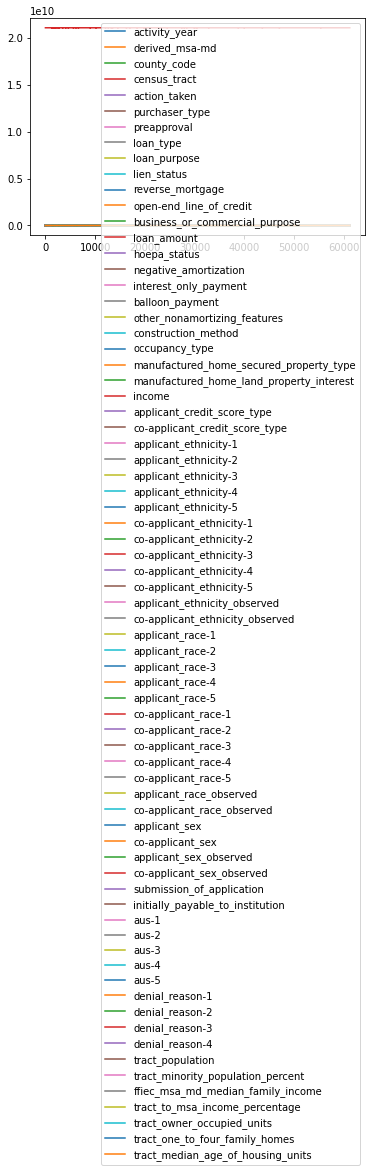

In [21]:
house_df.plot()

<Axes: ylabel='aus-1'>

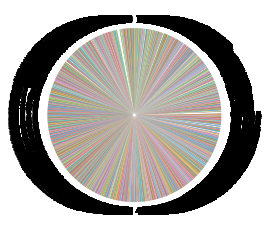

In [10]:
house_df['aus-1'].plot.pie()